# Regression Models with Random Forest

## Load the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Features

In [2]:
df = pd.read_csv('Data/padel_descriptors_final.csv')
X = df.drop(['Unnamed: 0', 'pIC50'], axis=1)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_X,APC2D1_N_N,APC2D1_O_S,APC2D2_C_C,...,SubFP137,SubFP169,SubFP172,SubFP179,SubFP181,SubFP182,SubFP184,SubFP275,SubFP287,SubFP303
0,25.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,32.0,...,0,1,0,0,0,0,0,1,0,0
1,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0,1,0,0,0,0,0,1,0,0
2,26.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,33.0,...,0,1,0,0,0,0,0,1,0,0
3,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0,1,0,0,0,0,0,1,0,0
4,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,32.0,3.0,4.0,0.0,1.0,2.0,3.0,0.0,0.0,44.0,...,1,0,0,0,0,0,0,1,1,0
3049,28.0,5.0,4.0,2.0,3.0,1.0,4.0,1.0,0.0,36.0,...,0,0,0,1,1,0,1,1,0,0
3050,28.0,7.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,36.0,...,0,0,0,1,1,0,1,1,0,0
3051,37.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,48.0,...,0,1,0,0,0,0,0,1,1,0


### Targets

In [3]:
y = df['pIC50']
y

0       8.602060
1       8.124939
2       8.508638
3       8.408935
4       8.130768
          ...   
3048    7.238824
3049    7.987163
3050    7.882729
3051    6.508638
3052    7.823909
Name: pIC50, Length: 3053, dtype: float64

## Data split (80/20 ratio)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape, Y_train.shape

((2442, 3151), (2442,))

In [6]:
X_test.shape, Y_test.shape

((611, 3151), (611,))

## Building a Regression Model using Random Forest

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train.values.ravel())
r2 = model.score(X_test, Y_test)
r2

0.7834214168180119

In [13]:
Y_pred = model.predict(X_test)

## Scatter Plot of Experimental vs Predicted pIC50 Values

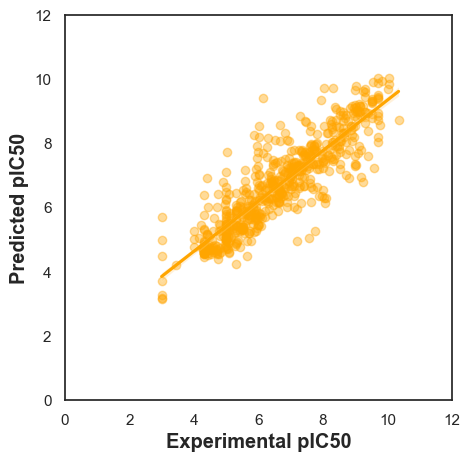

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4}, color='orange')
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

The closer this plot is to 45 degree line, the closer predicted and experimental values are.

## Save Model as Pickle Object

In [10]:
import pickle

In [11]:
pickle.dump(model, open('estrogen_receptor_alpha_model.pkl', 'wb'))